21/Agosto/2025

*Ángela Valentina Bustos Giraldo* , *Mariana Montoya Torres*

<h1>RAYOS X</h1>

<h4>Datos de Calibración:</h4>

<p>Se utilizó un crital de LiF con una distancia (d) intermolecular de <b>201 pm</b> para el primer y segundo día de toma de datos.  </p>

<p>Respecto a los ángulos para la máxima intensidad se obtuvieron dos distintos para los dos días de toma de datos. En el primer día se obtuvo máxima intensidad en un ángulo de <b>20,9°</b> con una diferencia de 1,7° del valor esperado en la guía y para el segundo día se obtuvo máxima intensidad en un ángulo de <b>20,8°</b> con una diferencia de 1,8° del valor esperado en la guía. </p>

El objetivo del experimento es analizar el comportamiento de los rayos X y verificar sus propiedades. Para esto se realizan diferentes mediciones como medir el espectro del cobre usando el cristal LiF, su atenuación, 


<h4> Procesamiento de toma de datos </h4>

In [13]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

def leer_columnas(path_archivo):
    columnas = []

    with open(Path(path_archivo), "r", encoding="latin-1", errors="ignore") as f:
        for linea in f:
            partes = linea.strip().replace(",", ".").split()
            try:
                fila = [float(x) for x in partes]
                # inicializa las listas de columnas si es la primera fila
                if not columnas:
                    columnas = [[] for _ in range(len(fila))]
                # agrega cada valor a su columna correspondiente
                for i, val in enumerate(fila):
                    columnas[i].append(val)
            except ValueError:
                # ignora filas con datos no numéricos
                continue

    return columnas


<h3>Actividad 1:</h3>
<p>Gráficar intensidad contra longitud de onda utilizando la ley de Bragg.</p>

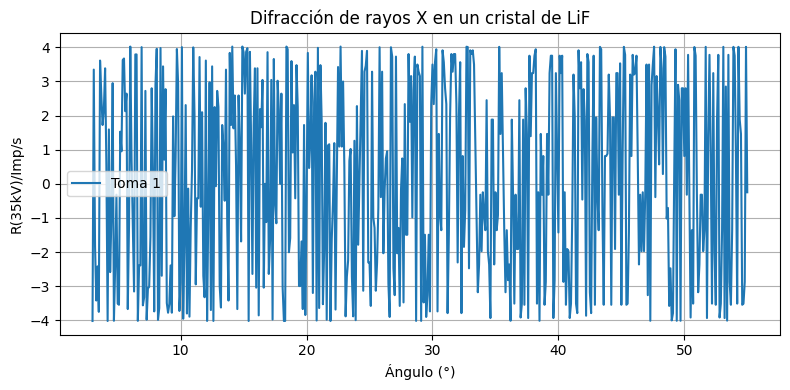

In [14]:
import math

act_1 = leer_columnas("250821_Actividad1_RayosX_Toma1.txt")
n= 1
lambda_bragg = []
for i in act_1[1]:
    lambda_= 2 *201e-12 * math.sin(i) * (1/n)
    lambda_bragg.append(lambda_ * 1e10)  # Convertir a Angstroms
plt.figure(figsize=(8, 4))

plt.plot(act_1[0], lambda_bragg, label="Toma 1")
plt.legend()

plt.xlabel("Ángulo (°)")
plt.ylabel("R(35kV)/Imp/s")
plt.title("Difracción de rayos X en un cristal de LiF")
plt.tight_layout()
plt.grid(True)

plt.show()


<h4> Conclusiones iniciales </h4>

Hehe

<h3> Actividad 2:</h3>

La absorción de los rayos X usando la relación μ/ρ . A lo largo de la práctica se varía el espesor de cada material, Al y Zn en este caso.


<p>Ángulo Intensidad Máxima : 20,9 °. d del LiF = 201 pm. Con unos absorvedores de Al de 0,1 mm, 0,08 mm y 0,06 mm ,para la primera toma de datos.</p>

<p> Ángulo Intensidad Máxima : 20,7°. d del LiF = 201 pm. Con unos absorvedores de Al de 0,02 mm y 0,04 mm; Zn de 0,075 mm, 0,025nm. para la segunda toma de datos</p> 

In [15]:
act_2_1 = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida1.txt") # Al 0,1 mm 
act_2_2  = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida2.txt")  #Al 0,08 mm
act_2_3  = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida3.txt")  #Al 0,06 mm
act_2_4 = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida4.txt")  #Al 0,02 mm
act_2_5 = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida5.txt")  #Al 0,04 mm

act_2_6 =  leer_columnas("250821_Actividad2_RayosX_Toma1_Medida6.txt")  #Zn 0,075 mm
act_2_7 =  leer_columnas("250821_Actividad2_RayosX_Toma1_Medida7.txt")  #Zn 0,025 mm


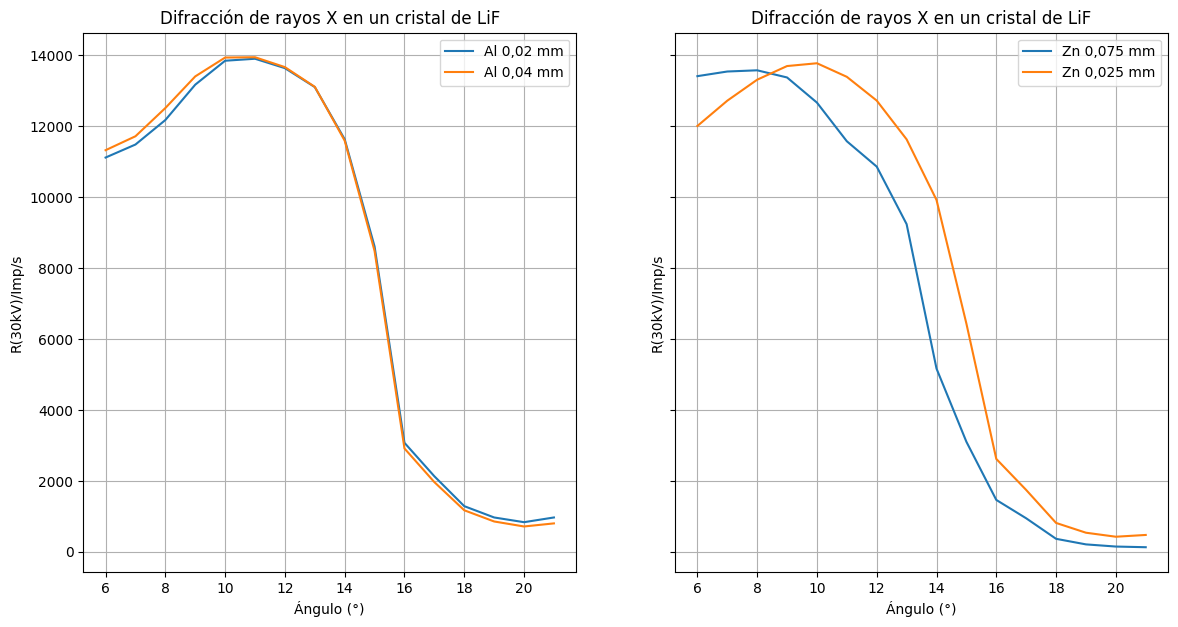

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 7), sharey=True)

ax1.set_xlabel("Ángulo (°)")
ax1.set_ylabel("R(30kV)/Imp/s")
ax1.set_title("Difracción de rayos X en un cristal de LiF")
ax1.grid(True)
ax1.plot(act_2_4[0], act_2_4[1], label="Al 0,02 mm")
ax1.plot(act_2_5[0], act_2_5[1], label="Al 0,04 mm")
ax1.legend()    

ax2.set_xlabel("Ángulo (°)")
ax2.set_ylabel("R(30kV)/Imp/s")
ax2.set_title("Difracción de rayos X en un cristal de LiF")
ax2.grid(True)
ax2.plot(act_2_6[0], act_2_6[1], label="Zn 0,075 mm")
ax2.plot(act_2_7[0], act_2_7[1], label="Zn 0,025 mm")
ax2.legend()    


Gráfica de regresiones logaritmicas de Intensidad contra espesor para AI y Zn

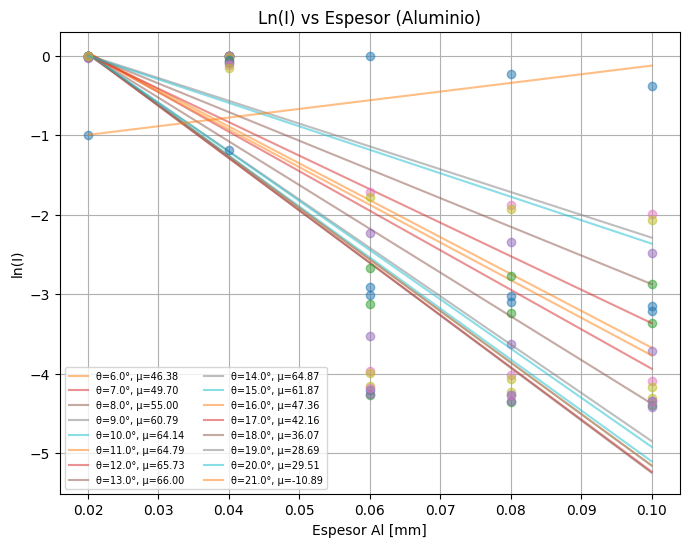

C:\Users\Flutt\AppData\Local\Temp\ipykernel_34500\3805721064.py:55: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(linear, espesores_Zn, lnI_zn)


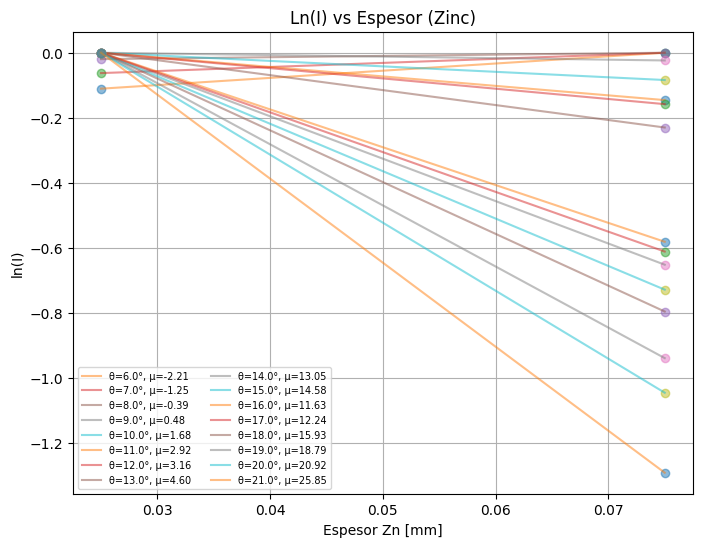

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --------------------------
# Función lineal
# --------------------------
def linear(x, a, b):
    return a*x + b   # a = -μ , b = ln(I0)

# --------------------------
# Espesores y datos
# --------------------------
espesores_Al = np.array([0.10, 0.08, 0.06, 0.04, 0.02])  # mm
datos_Al = [act_2_1, act_2_2, act_2_3, act_2_5, act_2_4]

espesores_Zn = np.array([0.075, 0.025])  # mm
datos_Zn = [act_2_6, act_2_7]

thetas = datos_Al[0][0]   # primera columna = ángulos

# --------------------------
# Graficar todas juntas - ALUMINIO
# --------------------------
plt.figure(figsize=(8,6))
for i, th in enumerate(thetas):
    I_al = np.array([np.interp(th, d[0], d[1]) for d in datos_Al])
    I_al = I_al / np.max(I_al)
    lnI_al = np.log(I_al)

    if np.all(np.isfinite(lnI_al)):  # evitar problemas con log(0)
        popt, _ = curve_fit(linear, espesores_Al, lnI_al)
        fit = linear(espesores_Al, *popt)
        plt.plot(espesores_Al, lnI_al, "o", alpha=0.5)
        plt.plot(espesores_Al, fit, "-", alpha=0.5,
                 label=f"θ={th:.1f}°, μ={-popt[0]:.2f}")

plt.xlabel("Espesor Al [mm]")
plt.ylabel("ln(I)")
plt.title("Ln(I) vs Espesor (Aluminio)")
plt.legend(fontsize=7, ncol=2)
plt.grid(True)
plt.show()

# --------------------------
# Graficar todas juntas - ZINC
# --------------------------
plt.figure(figsize=(8,6))
for i, th in enumerate(thetas):
    I_zn = np.array([np.interp(th, d[0], d[1]) for d in datos_Zn])
    I_zn = I_zn / np.max(I_zn)
    lnI_zn = np.log(I_zn)

    if np.all(np.isfinite(lnI_zn)) and len(espesores_Zn) >= 2:
        popt, _ = curve_fit(linear, espesores_Zn, lnI_zn)
        fit = linear(espesores_Zn, *popt)
        plt.plot(espesores_Zn, lnI_zn, "o", alpha=0.5)
        plt.plot(espesores_Zn, fit, "-", alpha=0.5,
                 label=f"θ={th:.1f}°, μ={-popt[0]:.2f}")

plt.xlabel("Espesor Zn [mm]")
plt.ylabel("ln(I)")
plt.title("Ln(I) vs Espesor (Zinc)")
plt.legend(fontsize=7, ncol=2)
plt.grid(True)
plt.show()


Tablas con incertidumbre de AI y Zn

In [34]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# --------------------------
# Función lineal
# --------------------------
def linear(x, a, b):
    return a*x + b

# --------------------------
# Ejemplo con Aluminio
# --------------------------
espesores_Al = np.array([0.10, 0.08, 0.06, 0.04, 0.02])  # mm
datos_Al = [act_2_1, act_2_2, act_2_3, act_2_5, act_2_4]
thetas = datos_Al[0][0]

rows = []
for i, th in enumerate(thetas):
    I_al = np.array([np.interp(th, d[0], d[1]) for d in datos_Al])
    I_al = I_al / np.max(I_al)
    lnI_al = np.log(I_al)

    if np.all(np.isfinite(lnI_al)):
        popt, pcov = curve_fit(linear, espesores_Al, lnI_al)
        slope, intercept = popt
        perr = np.sqrt(np.diag(pcov))   # incertidumbres
        slope_err = perr[0]

        # Calcular R^2
        y_fit = linear(espesores_Al, *popt)
        ss_res = np.sum((lnI_al - y_fit) ** 2)
        ss_tot = np.sum((lnI_al - np.mean(lnI_al)) ** 2)
        r2 = 1 - (ss_res / ss_tot)

        rows.append({
            "Data": f"I{i+1}",
            "Pendiente (a)": slope,
            "Incertidumbre": slope_err,
            "R²": r2
        })

# --------------------------
# Crear DataFrame
# --------------------------
df = pd.DataFrame(rows)
df["Pendiente (a)"] = df["Pendiente (a)"].map(lambda x: f"{x:.5f}")
df["Incertidumbre"] = df["Incertidumbre"].map(lambda x: f"±{x:.5f}")
df["R²"] = df["R²"].map(lambda x: f"{x:.5f}")

print(df)

# Guardar si quieres
df.to_csv("tabla_resultados.csv", index=False)


   Data Pendiente (a) Incertidumbre       R²
0    I1     -46.37790     ±13.96857  0.78607
1    I2     -49.69741     ±15.02398  0.78482
2    I3     -55.00385     ±17.17066  0.77378
3    I4     -60.79381     ±19.52012  0.76377
4    I5     -64.14254     ±20.39051  0.76736
5    I6     -64.79231     ±20.65336  0.76638
6    I7     -65.73109     ±21.06593  0.76445
7    I8     -66.00424     ±20.91466  0.76851
8    I9     -64.86547     ±20.51237  0.76923
9   I10     -61.87493     ±19.43958  0.77153
10  I11     -47.36461     ±14.29933  0.78528
11  I12     -42.15983     ±12.48755  0.79164
12  I13     -36.07059     ±10.07651  0.81030
13  I14     -28.69240      ±7.31114  0.83697
14  I15     -29.51215      ±7.36799  0.84247
15  I16      10.89201      ±6.84350  0.45781


Exponente p = -1.859 ± 0.473


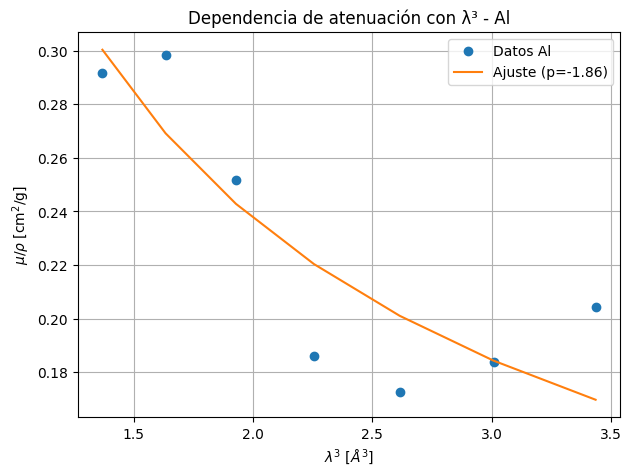

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --------------------------
# Datos obtenidos previamente (ejemplo Al)
# Pendientes en 1/mm
mu_mm = np.array([-7.87577, -8.05881, -6.79691, -5.02788, -4.66162, -4.95984, -5.51997])
thetas_deg = np.array([16, 17, 18, 19, 20, 21, 22])  # ángulos ejemplo

# Convertir pendientes a 1/cm
mu_cm = -mu_mm * 0.1  # negativo porque pendiente es -mu

# --------------------------
# Parámetros físicos
d = 201.4e-12  # m (ejemplo NaCl)
rho_Al = 2.70  # g/cm^3

# Calcular lambda
thetas = np.radians(thetas_deg)
lambda_vals = 2*d*np.sin(thetas)  # en m
lambda_A = lambda_vals*1e10       # en Å
lambda_cub = lambda_A**3

# mu/rho
mu_rho = mu_cm / rho_Al

# --------------------------
# Ajuste lineal en escala log-log
def modelo(x, C, p):
    return C * (x**p)

popt, pcov = curve_fit(modelo, lambda_A, mu_rho)
C_fit, p_fit = popt
p_err = np.sqrt(np.diag(pcov))[1]

print(f"Exponente p = {p_fit:.3f} ± {p_err:.3f}")

# --------------------------
# Graficar mu/rho vs lambda^3
plt.figure(figsize=(7,5))
plt.plot(lambda_cub, mu_rho, "o", label="Datos Al")
plt.plot(lambda_cub, modelo(lambda_A, *popt), "-", label=f"Ajuste (p={p_fit:.2f})")
plt.xlabel(r"$\lambda^3$ [$\AA^3$]")
plt.ylabel(r"$\mu/\rho$ [cm$^2$/g]")
plt.title("Dependencia de atenuación con λ³ - Al")
plt.legend()
plt.grid(True)
plt.show()


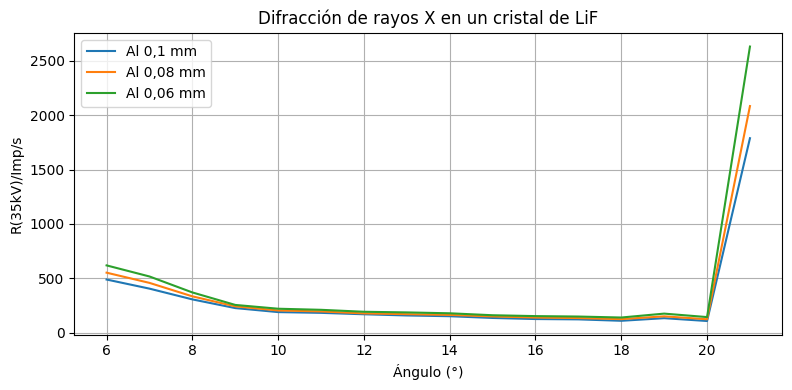

In [7]:
plt.figure(figsize=(8, 4))
plt.xlabel("Ángulo (°)")
plt.ylabel("R(35kV)/Imp/s")
plt.title("Difracción de rayos X en un cristal de LiF")
plt.tight_layout()
plt.grid(True)

plt.plot(act_2_1[0], act_2_1[1], label="Al 0,1 mm ")
plt.plot(act_2_2[0], act_2_2[1], label="Al 0,08 mm")
plt.plot(act_2_3[0], act_2_3[1], label="Al 0,06 mm")
plt.legend()
plt.show()

<h4> Conclusiones iniciales </h4>

Hehe

<h3>Actividad 3: </h3>

<p> 1. Se variar el voltaje de (11,35) kV variando de a 2kV, corriente (una se deja constante) con el valor de 1mA y con ángulo variante entre (19°,24°) con un aumento de 0,1°.</p>

<p> 2. Se variar la corriente (0,1,1)mA variando de a 0,1 mA, un voltaje constante de 35 kV y con ángulo variante entre (19°,24°) con un aumento de 0,1°. </p>

In [8]:
act_3_1 = leer_columnas("250821_Actividad3_RayosX_Toma1.txt") # Voltaje Variando
act_3_2 = leer_columnas("250821_Actividad3_RayosX_Toma1_Medida1.txt") # Corriente Variando 0,1 mA
act_3_3 = leer_columnas("250821_Actividad3_RayosX_Toma1_Medida2.txt") # Corriente Variando 0,5 mA
act_3_4 = leer_columnas("250821_Actividad3_RayosX_Toma1_Medida3.txt") # Corriente Variando 0, 8mA

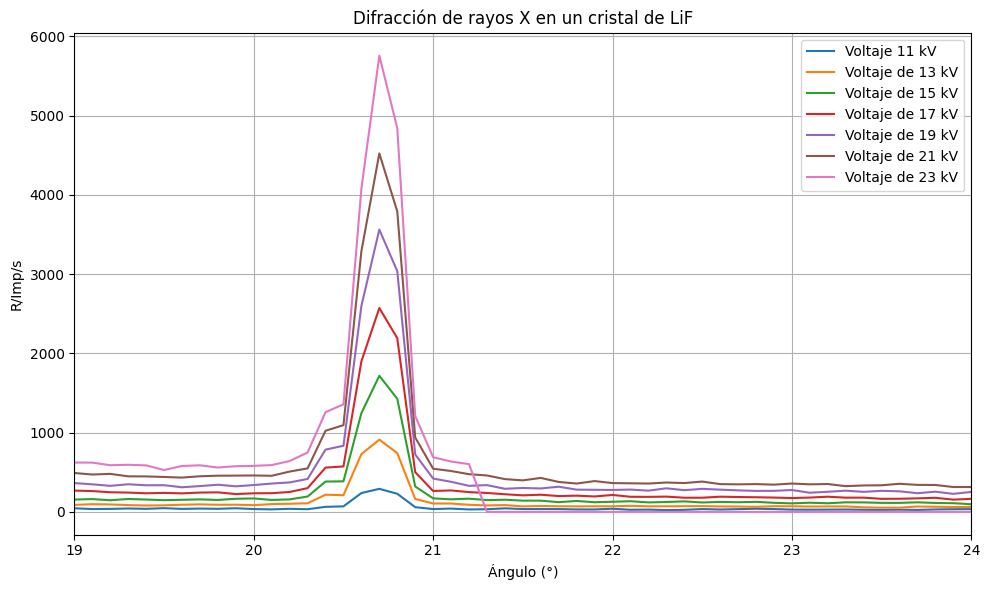

In [9]:
plt.figure(figsize=(10, 6))

plt.plot(act_3_1[0], act_3_1[1], label="Voltaje 11 kV")
plt.plot(act_3_1[0], act_3_1[2], label="Voltaje de 13 kV")
plt.plot(act_3_1[0], act_3_1[3], label="Voltaje de 15 kV")
plt.plot(act_3_1[0], act_3_1[4], label="Voltaje de 17 kV")
plt.plot(act_3_1[0], act_3_1[5], label="Voltaje de 19 kV")
plt.plot(act_3_1[0], act_3_1[6], label="Voltaje de 21 kV")
plt.plot(act_3_1[0], act_3_1[7], label="Voltaje de 23 kV")
#plt.plot(act_3_1[0], act_3_1[8], label="Voltaje de 25 kV")
#plt.plot(act_3_1[0], act_3_1[9], label="Voltaje de 27 kV")
#plt.plot(act_3_1[0], act_3_1[10], label="Voltaje de 29 kV")
#plt.plot(act_3_1[0], act_3_1[11], label="Voltaje de 31 kV")
#plt.plot(act_3_1[0], act_3_1[12], label="Voltaje de 33 kV")
#plt.plot(act_3_1[0], act_3_1[13], label="Voltaje de 35 kV")

plt.xlim(19,24)
plt.title("Difracción de rayos X en un cristal de LiF")
plt.xlabel("Ángulo (°)")
plt.ylabel("R/Imp/s")
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

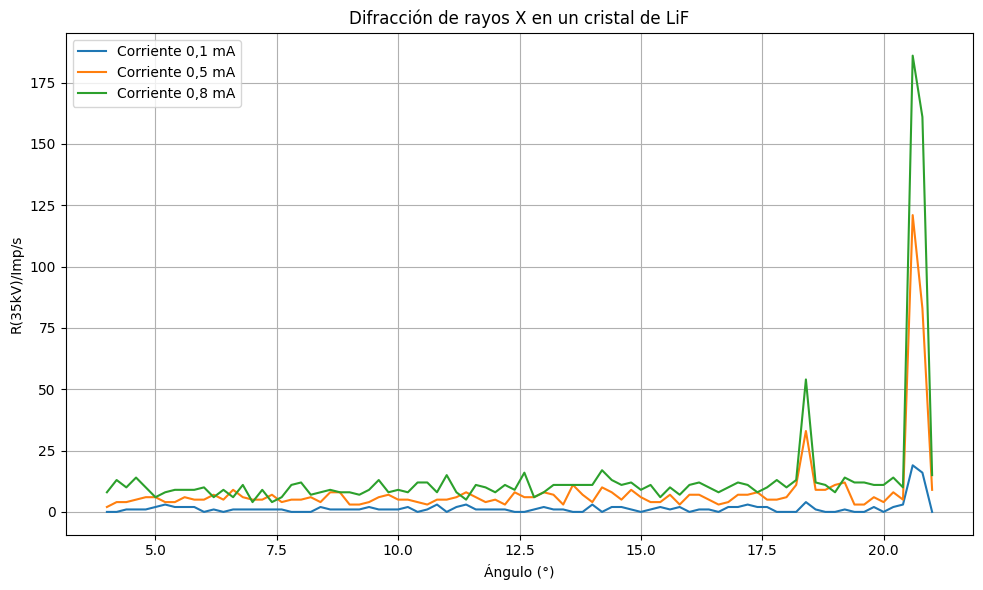

In [10]:
plt.figure(figsize=(10, 6))
plt.xlabel("Ángulo (°)")
plt.ylabel("R(35kV)/Imp/s")
plt.title("Difracción de rayos X en un cristal de LiF")
plt.tight_layout()
plt.grid(True)

plt.plot(act_3_2[0], act_3_2[1], label="Corriente 0,1 mA")
plt.plot(act_3_3[0], act_3_3[1], label="Corriente 0,5 mA")
plt.plot(act_3_4[0], act_3_4[1], label="Corriente 0,8 mA")
plt.legend()
plt.show()



<h4> Conclusiones iniciales </h4>

La gráfica de voltaje variante y corriente constante se descartaron los voltajes de 25 kV al 35 kV ya que no aportaban información valiosa al ser constantemente 0.

<h3>Actividad 4: </h3>
<p> Para esta parte de la práctica se comprueba la ley de Duane - Hunt hallando la longitud de onda mínima en la cuál se da el efecto de Bremsstrah-lung. </p>

<p>Ángulo variante de (4,21)°, voltaje variante (13, 35) kV con pasos de 2kV y corriente 1mA fija. </p>

In [11]:
act_4_1 = leer_columnas("250821_Actividad4_RayosX_Toma1.txt")

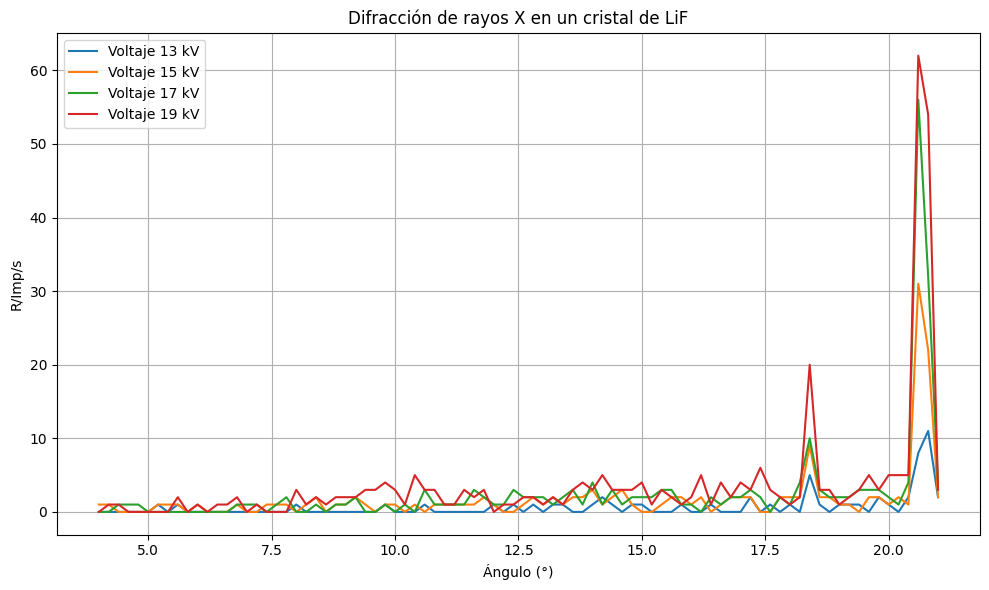

In [12]:
plt.figure(figsize=(10, 6))

plt.plot(act_4_1[0], act_4_1[1], label="Voltaje 13 kV")
plt.plot(act_4_1[0], act_4_1[2], label="Voltaje 15 kV")
plt.plot(act_4_1[0], act_4_1[3], label="Voltaje 17 kV")
plt.plot(act_4_1[0], act_4_1[4], label="Voltaje 19 kV")
#plt.plot(act_4_1[0], act_4_1[5], label="Voltaje 21 kV")
#plt.plot(act_4_1[0], act_4_1[6], label="Voltaje 23 kV")
#plt.plot(act_4_1[0], act_4_1[7], label="Voltaje 25 kV")
#plt.plot(act_4_1[0], act_4_1[8], label="Voltaje 27 kV")
#plt.plot(act_4_1[0], act_4_1[9], label="Voltaje 29 kV")
#plt.plot(act_4_1[0], act_4_1[10], label="Voltaje 31 kV")
#plt.plot(act_4_1[0], act_4_1[11], label="Voltaje 33 kV")
#plt.plot(act_4_1[0], act_4_1[12], label="Voltaje 35 kV") 

plt.xlabel("Ángulo (°)")
plt.ylabel("R/Imp/s")
plt.title("Difracción de rayos X en un cristal de LiF")
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

<h4> Conclusiones iniciales </h4>


Se descartó los voltaje del 21kV a 35 kV debido a que no  aportaba información valiosa al ser constantemente 0. 